<a href="https://colab.research.google.com/github/ramayer/google-colab-examples/blob/main/Povray_in_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y povray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  libsdl1.2debian povray povray-includes
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,723 kB of archives.
After this operation, 5,790 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libsdl1.2debian amd64 1.2.15+dfsg2-0.1ubuntu0.1 [175 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray amd64 1:3.7.0.4-2 [1,284 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray-includes all 1:3.7.0.4-2 [264 kB]
Fetched 1,723 kB in 1s (1,158 kB/s)
Selecting previously unselected package libsdl1.2debian:amd64.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack 

In [ ]:
ball = """
 #include "colors.inc"
 #include "stones.inc"    // pre-defined scene elements
  #include "textures.inc"    // pre-defined scene elements
  #include "shapes.inc"
  #include "glass.inc"
  #include "metals.inc"
  #include "woods.inc"
  
  background { color Black }
  camera {
    location <0, 2, -3>
    look_at  <0, 1,  2>
  }
  sphere {
    <0, 1, 2>, 1
        texture { T_Stone1 scale 4 }

  }
/*

  cone {
    <0, 1, 0>, 0.3    // Center and radius of one end
    <1, 2, 3>, 1.0    // Center and radius of other end
    texture { T_Stone30 scale 1 }
  }
  */
  torus {
    1, 0.3              // major and minor radius
    rotate -90*x      // so we can see it from the top
 material {
  texture {
    pigment {
      color rgbt <1, 1, 1, 1>
    }
    finish {
      ambient 0.3
      diffuse 0.3

      reflection {
        0.0, 1.0
        fresnel on
      }

      specular 0.4
      roughness 0.003
    }
    normal {
      function {
        f_ridged_mf(x, y, z, 0.1, 3.0, 7, 0.7, 0.7, 2)
      } 0.8
      scale 0.13
    }
  }
  interior {
    ior 1.3
  }
}  }
  light_source { <2, 4, -3> color White}
"""



In [ ]:
ball = """
global_settings {assumed_gamma 1.5 charset utf8}

light_source {
   <4, 5, -5>, rgb <1, 1, 1>
}

camera {
   orthographic
   location <0, 0, -5>
   sky <0, 1, 0>
   direction <0, 0, 1>
   right <1.3333, 0, 0>
   up <0, 1, 0>
   look_at <0, 0, 0>
}

// #declare intergal = text {   ttf "/mnt/d/Fonts/arialuni.ttf",   "\u222b",   1,0};
// #declare intergal = text {   ttf "/mnt/d/Fonts/arialuni.ttf",   "\u03a3",   1,0};
// #local omin = min_extent(intergal);
// #local omax = max_extent(intergal);
// #declare intergal = object {intergal translate <-(omin.x+omax.x)/2,-(omin.y+omax.y)/2,0>}
/*
object {
    intergal
    rotate    <0,0, 90>
    scale     <.5,.5,.5>
    translate <0,-.2,-.1>
    texture {
      pigment { color rgb <0, 0, 0>   }
      finish  { ambient 1             }
    }
}
*/
sphere {
   <0, 0, 0>, 0.5
   scale 0.2
   rotate <0, 0, 0>
   translate <-0.2, 0.2, 0>
}

sphere {
   <0, 0, 0>, 0.5
   scale 0.2
   rotate <0, 0, 0>
   translate <0.2, 0.2, 0>
}

cylinder {
   <0, 0.5, 0>, <0, 0, 0>, 0.5
   scale 1
   rotate x*90
   translate <0, 0, 1>
   pigment {
      color rgb <0, 0, 0>
   }
   finish {
   ambient 1
   }
}

cylinder {
   <0, 0.5, 0>, <0, 0, 0>, 0.475
   scale 1
   rotate x*90
   translate <0, 0, 0>
   pigment {
      color rgb <1, 1, 0>
   }
   finish {
   ambient 1
   }
}

sky_sphere { pigment { color rgb <1,1,1> }}
"""

In [ ]:
ball = """
#declare rd                        = seed(1400);
#declare show_ground               = on;
#declare show_fog                  = on;
#declare show_bubbles              = on;
#declare show_layered_cloud_sphere = on;
#declare num_coolclouds            = 50*1;
#declare show_comet_lights         = on;
#declare show_comets               = on;
#declare extrabubbles              = 10*0;
#declare lighting                  = 2; // 1==day 2==night 3==dawn 4=dusk
#declare Clock                     = clock;  
#debug concat(str(Clock,5,5),"\n")

global_settings {assumed_gamma 1.8 max_trace_level 25}
camera          {location  <0,3,-10> look_at   <0,5.5,0>}
light_source    {<-90,90,-30> rgb 1}
                                                                                
///////////////////////////////////////////////////////////////////////////////
// Ground
///////////////////////////////////////////////////////////////////////////////
#if (show_ground)  
 plane {y, -1 
  texture {
   pigment {color rgb <.1,.2,.5>}
   normal {
      average 
      normal_map {
         [  Clock bumps 1 translate <0,(Clock-1)*2,-(Clock-1)*20>] 
         [1-Clock bumps 1 translate <0,(Clock  )*2,-(Clock  )*20>] 
      }
      scale <5,1,1>*2
      rotate <0,10,0>
      warp{turbulence .5 octaves 2}
   }
   finish  {ambient 0 diffuse 0.5 specular 0.5 reflection 0.15}
  }
 } 
# end                                                                           

///////////////////////////////////////////////////////////////////////////////
// Bubbles
///////////////////////////////////////////////////////////////////////////////
#declare bubbletexture = 
   texture {
      finish {diffuse .5 ambient 0}
      pigment {
         bozo scale 3 frequency 4 turbulence .5
         color_map {
           [0.00 color rgb <1.0,0.5,0.25> transmit .75]
           [0.33 color rgb <0.25,0.5,1.0> transmit .75]
           [0.66 color rgb <0.5,1.0,0.25> transmit .75]
           [1.00 color rgb <1.0,0.5,0.25> transmit .75]
         }
      } 
   }
/*
#declare logotexture = texture {
      pigment {
        image_map {
          gif "100X30_White_logo.gif"
          transmit all .5
          transmit 0,1
          once
        }
        translate <0,-.5,0>         
        scale <.25,5,1>
        warp { cylindrical }
      }
      finish {ambient .6 diffuse .6}
    } 
*/
#macro bubblepiece(Center,Radius)
 sphere {
  Center, Radius 
  hollow
/*
  #if (Radius>7)
  texture          {logotexture rotate <0,-360*Clock*2+120,0> translate Center}
  interior_texture {logotexture rotate <0,-360*Clock*2+120,0> translate Center}
  #end
  */
  texture          {bubbletexture finish {roughness 0.015 specular 0.7 reflection {.3 } } }
  interior_texture {bubbletexture finish {roughness 0.04  specular 0.6 reflection {.2 } } }
 }    
#end 

#macro bubble(Center,Radius,Speed,SpeedMult)
union {
   #declare j=-5;
   #while (j<5)
     object {bubblepiece(Center,Radius) translate <0,Clock*Speed*SpeedMult+j*Speed,0>}
     #declare j=j+1;
   #end
}
#end
                            
#if (show_bubbles)       
 bubble(<-24,18,30>,3    ,71,3)
 bubble(<-18, 8,25>,2    ,45,4)
 bubble(<-15,19,40>,8    ,50,2)
 bubble(<-4 ,25,30>,1.5  ,60,1)
 bubble(<-2 ,12,35>,5    ,30,2)
 bubble(< 6 ,14,50>,4    ,78,2)                                                             
 bubble(< 15,20,40>,2    ,33,3)
 bubble(< 28,19,40>,3    ,45,2)
 #declare i=0;
 #while (i<extrabubbles)
   bubble(<rand(rd)*500-250,rand(rd)*50,rand(rd)*150+50>,rand(rd)*5,rand(rd)*40+30,2)
   #declare i=i+1;
 #end
#end
                                                                                           
///////////////////////////////////////////////////////////////////////////////
// Comets
///////////////////////////////////////////////////////////////////////////////
#if (show_comets) 

#declare CometColor=<1,.8,0>;

#macro comet(Size)
sphere {
 0,1
 pigment{rgbt <1,1,1,1>} 
 interior {
  media {
   emission CometColor*1.75/Size
   method 3 
   density {spherical color_map {[0 rgb 0.0] [1 rgb 1]} poly_wave 2 }
   density {spherical color_map {[0 rgb 0.0] [1 rgb 1]} cubic_wave scale <1,1,1>*2 translate <0,1,0>}
  }
  media {
   emission 2/Size
   method 3 
   density {spherical color_map {[0 rgb 0.0] [0.5 rgb CometColor/2+.5] [1 rgb 1]} poly_wave 2 }
   density {spherical color_map {[0 rgb 0.0] [0.5 rgb CometColor/2+.5] [1 rgb 1]} cubic_wave 
            scale <1,1,1>*2 translate <0,1,0>}
   scale .5
   translate <0,0.4,0>
  }
 }  
 hollow no_shadow
 scale <1,3,1>*Size  rotate <90,0,0>
}
#end

#include "transforms.inc"
#declare MySpline = spline { 
      cubic_spline
       0-2/10/3, <-42, 2,20> // init
       0-1/10/3, <-41, 2,20> 
       0-0/10/3, <-40, 2,20> 
       0+1/10/3, <-39, 2,20> 
       0+2/10/3, <-38, 2,20> 

       .33 +  0/10/3, <-30, 2,20> //zoom
       .33 +  3/10/3, <  3, 4,30> 
       .33 +  8/10/3, < 24,15,40>
       .33 + 10/10/3, < 50,40,50>
       .33 + 11/10/3, < 60,50,60>
       .33 + 12/10/3, < 70,60,70>
                
       0.80,       < 70,60,-1> //return
       0.90,       <-32, 2,-1>
        
       1-2/10/3, <-42, 2,20> // rest
       1-1/10/3, <-41, 2,20>
       1-0/10/3, <-40, 2,20> 
       1+1/10/3, <-39, 2,20> 
       1+2/10/3, <-38, 2,20>
}

union {
 #declare x1=1*sin(Clock*3.14*2);
 #declare x2=2*cos(Clock*3.14*2);
 #declare y1=3*cos(Clock*3.14*2);
 #declare y2=1*sin(Clock*3.14*2);
 difference {
    comet(4) 
    object {comet(2)   translate <x1,y1,-6>}
    object {comet(1.5) translate <x2,y2,-12>}
 }
 object {comet(2)   translate <x1,y1,-6>} 
 object {comet(1.5) translate <x2,y2,-12>}
 #if (show_comet_lights) 
   light_source {<x2,y2,-12> CometColor*.51 fade_distance 10 fade_power 2}
   light_source {<x1,y1,-6>  CometColor*.51 fade_distance 10 fade_power 2}
   light_source {<0,0,0>     CometColor*.51 fade_distance 15 fade_power 2}
 #end
 Spline_Trans(MySpline, Clock, y, 0.1, 0.5)
}

#end

///////////////////////////////////////////////////////////////////////////////
// Sky
///////////////////////////////////////////////////////////////////////////////

 #declare C1 = 1;
 #declare C2 = 0;
#if (lighting=2)
 #declare C1 = 0;
 #declare C2 = 1;
#end
#if (lighting=3)
 #declare C1 = Clock;
 #declare C2 = 1-Clock;
#end
#if (lighting=4)
 #declare C1 = 1-Clock;
 #declare C2 = Clock;
#end
                                    /* DAY */                                    /* NIGHT */
 #declare BlueSkyColor            = color rgb  <0.0,.15,0.5  >      *C1+C2*      <0.01,.0,.07>;
 #declare FogColor                = color rgb  <0.4,0.5,0.6  >      *C1+C2*      < .0, .0,.01>;
 #declare LayeredCloudColor0      = color rgb  <1  ,1  ,1    >      *C1+C2*      < .3, .0,.8>;
 #declare LayeredCloudColor1      = color rgb  <1  ,1  ,1    >      *C1+C2*      < .5, .0,.8>;
 #declare CoolCloudFadeColor      = color rgbt < .7, .7, .7,1>      *C1+C2*      < .1, .0,.4,1>;
 #declare CoolCloudDarkColor      = color rgb  < .2, .3, .4  >      *C1+C2*      < .1, .0,.4>;
 #declare CoolCloudLightColor     = color rgb  <1  ,1  ,1    >*1.125*C1+C2*      < .5, .0,.9>;
 #declare CoolCloudHighlightColor = (CoolCloudLightColor*.8 + CoolCloudDarkColor*.2)*C1+C2*<.8,0,.9>;
 #declare CoolCloudHighlightAngle = 20*C1+C2*160;

///////////////////////////////////////////////////////////////////////////////

#if (show_layered_cloud_sphere)
 #macro LayeredCloudMacro(Turb1,Turb2,Break1,Transmit,Translate) 
    finish {ambient 1 diffuse 0}
    pigment { 
       bozo turbulence Turb1 translate Translate
       color_map {
          [Break1    , LayeredCloudColor0 transmit 1]
          [1         , LayeredCloudColor1 transmit Transmit]
       } 
       scale 10 
       warp {turbulence Turb2}
       scale .1
    }
 #end
 #declare ssq  = sin(Clock*3.1416*2)*sin(Clock*3.1416*2);
 #declare csq  = cos(Clock*3.1416*2)*cos(Clock*3.1416*2);
 #declare LCT1 = texture {LayeredCloudMacro(  1, .5,  .5, .5, <0,0,0>)}
 #declare LCT2 = texture {LayeredCloudMacro( .5,  1,  .5, .5, <0,0,0>)}         
 #declare LCT3 = texture {LayeredCloudMacro(  1,  1,  .5, .5, <0,0,0>)}         
                                                            
 #declare LCT_layered = texture {LCT1} texture {LCT2} texture {LCT3}        
 #declare LCT_anim    = texture {
      average 
      texture_map {
         [  Clock LCT_layered translate <Clock-1, Clock-1,Clock-1>*3] 
         [1-Clock LCT_layered translate <Clock  , Clock  ,Clock  >*3] 
      }
      scale <1,2,1>
   }
 sphere  { <0,-50000,0>, 51000  texture {LCT_anim scale 500} hollow}
#end



  // An even simpler texture than Gilles or Chris for faster animations.

#macro CoolCloudGradient(Trans)
 pigment_pattern {planar translate y*0.5 rotate -z*CoolCloudHighlightAngle}
 pigment_map{
       [.1     CoolCloudDarkColor      transmit Trans]
       [.8     CoolCloudLightColor     transmit Trans]
       [1      CoolCloudHighlightColor transmit Trans]
 }
#end
#macro CloudPigment(S1,S2,Turb,Lambda)
  pigment{
     pigment_pattern{cylindrical rotate -x*90}
     pigment_map{   
         [0.3 CoolCloudGradient(1  )]
         [0.4 CoolCloudGradient(0.9)]
         [0.7 CoolCloudGradient(0  )]
     } 
     scale <S1,1,S2>
     warp{turbulence Turb lambda Lambda}
     scale .2
  }
  finish{ambient 1 diffuse 0 specular 0}
#end
#declare CloudTile=object {
  disc { <0, 0, 0>, z, 0.5}
  hollow no_shadow   
  scale <1,.5,1>
}
// Nice trick from Gilles Tran for flattening cloud bottoms.
#macro CoolCloud(ThisTexture,TextureTranslate)
  #declare Cloud=object {CloudTile texture {ThisTexture translate TextureTranslate}}
  union{
      object{Cloud clipped_by{plane{y,0 inverse}}}
      object{Cloud clipped_by{plane{y,0}} scale <1,.5,1>}
  }
#end
#declare i=0;
#declare CloudSpeed=2000;
#declare CloudTextureSpeed=1;
#while (i<num_coolclouds)          
     #declare zcc =   500 +rand(rd)*5000       - CloudSpeed*Clock;
     #declare ycc =   300 +rand(rd)*200                          ;
     #declare xcc = (-1000+rand(rd)*2000)  * 3 + CloudSpeed*Clock;
     #declare TextureTranslate = <0,0,rand(rd)*100+Clock*CloudTextureSpeed>;
     #declare CloudScale  = 500+500*rand(rd) * 3;     
     #declare ThisTexture = texture {CloudPigment(1.5+rand(rd),1,0.35+rand(rd)*0.2+.2,3+rand(rd)-1) }
     #declare j=-2;
     #while (j<2)
       object{
        CoolCloud(ThisTexture,TextureTranslate + <0,0,j>*CloudTextureSpeed) 
        scale CloudScale          
        translate <xcc+CloudSpeed*j,ycc,zcc-CloudSpeed*j> 
       }
       #declare j=j+1;
     #end
   #declare i = i+1;
#end

   


// Background

#if (show_fog)                                          
 fog{FogColor fog_type 2 distance 600 fog_alt 50}
#end
sky_sphere { pigment { BlueSkyColor } }





"""

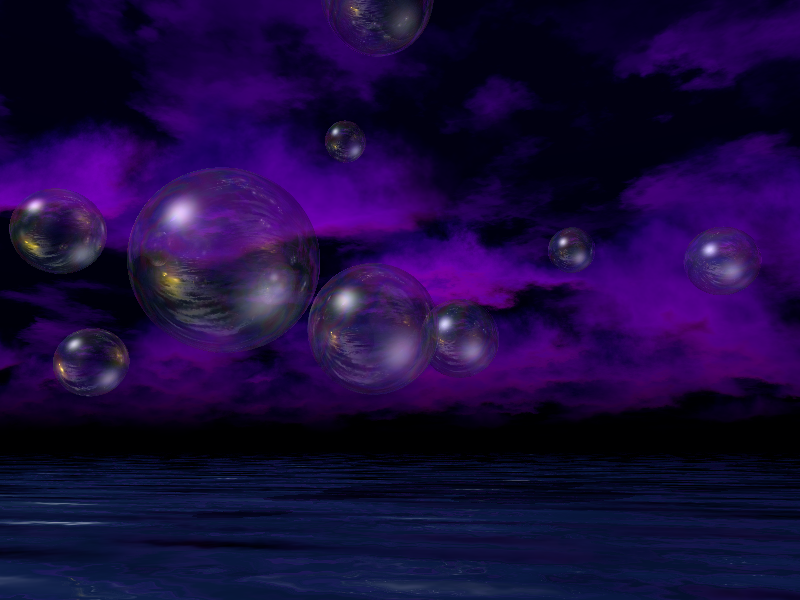

In [ ]:


with open("sphere.pov","w") as f:
    f.write(ball)

import subprocess
result = subprocess.run("""povray sphere.pov""",shell=True,capture_output=True)
result

if result.returncode == 0:
    from PIL import Image
    im = Image.open('sphere.png')
else:
    im = None
    print(str(result.stderr,'utf-8'))
    
im
